<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/first-steps/linear-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(linear-classification)=
# Introduction to Linear Classification

One important machine learning problem involves teaching a computer to classify data into categories. Linear classification is one of the simplest classification techniques, where the model makes decisions by computing a *linear combination* of features​.  

Suppose we have a dataset of students with two features: (1) the number of hours they studied for an exam and (2) the number of hours they slept the night before. Our goal is to classify whether a student passed the exam.

One way to approach this is to plot the data, using study hours on the $x$-axis and sleep hours on the $y$-axis. We might observe that students who passed tend to cluster in one region of the plot, while those who failed are in another. A linear classifier attempts to separate these two groups by drawing a straight line, known as the **decision boundary**. One side of the line corresponds to students predicted to pass, while the other corresponds to students predicted to fail.


Mathematically, the decision boundary could be represented by an equation like:

$$
0.3*(hours\_study) + 0.7*(hours\_sleep) - 4 = 0.
$$ 

Here, the coefficients ($0.3$ and $0.7$) are called **weights**, and the constant term ($-4$) is the **bias**.

For any new student, we can determine their predicted outcome by plugging their study and sleep hours into this equation:

* If the result is greater than $0$, the student is predicted to pass.
* If the result is less than $0$, the student is predicted to fail.


The goal of a linear classifier is to learn the best weights and bias that define the decision boundary.  Linear classifiers are popular because they are easy to understand, fast to train, and often work well as a first approach to many problems (like distinguishing spam emails from legitimate ones or classifying images into broad categories).



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Generate Data for the Example

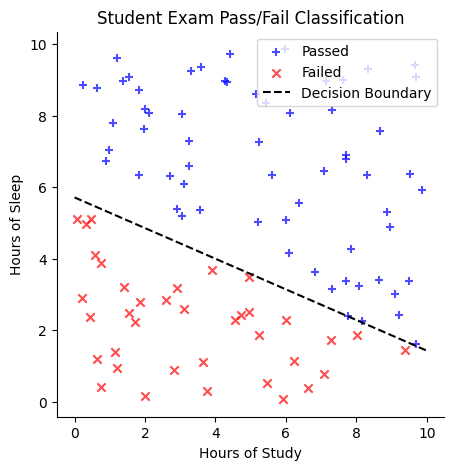

   Study Hours  Sleep Hours  Passed
0         3.75         0.31   False
1         9.51         6.36    True
2         7.32         3.14    True
3         5.99         5.09    True
4         1.56         9.08    True


In [2]:
# Generate random study hours and sleep hours
np.random.seed(42)
num_students = 100

 # Hours of study between 0 and 10 (randomly generated and rounded to 2 decimal places)
study_hours = np.random.uniform(0, 10, num_students).round(2) 

# Hours of sleep between 0 and 10 (randomly generated and rounded to 2 decimal places)
sleep_hours = np.random.uniform(0, 10, num_students).round(2)  

# Define the decision boundary: 0.3 * (hours_study) + 0.7 * (hours_sleep) - 4
decision_boundary = 0.3 * study_hours + 0.7 * sleep_hours - 4

# Classify students based on the decision boundary
labels = decision_boundary > 0  # True = Pass, False = Fail

# Create a DataFrame for visualization
data = pd.DataFrame({
    "Study Hours": study_hours,
    "Sleep Hours": sleep_hours,
    "Passed": labels
})

# Plot the data
plt.figure(figsize=(5, 5))
plt.scatter(
    data[data["Passed"]]["Study Hours"], 
    data[data["Passed"]]["Sleep Hours"], 
    color="blue", 
    label="Passed", 
    marker="+",
    alpha=0.7)
plt.scatter(
    data[~data["Passed"]]["Study Hours"], 
    data[~data["Passed"]]["Sleep Hours"], 
    color="red", 
    marker="x",
    label="Failed", 
    alpha=0.7)

# Plot the decision boundary line:
#  0.3*x + 0.7*y - 4 = 0 => y = (4 - 0.3*x) / 0.7
x_vals = np.linspace(0, 10, 100)
y_vals = (4 - 0.3 * x_vals) / 0.7
plt.plot(
    x_vals, 
    y_vals, 
    color="black", 
    linestyle="--", 
    label="Decision Boundary")

plt.xlabel("Hours of Study")
plt.ylabel("Hours of Sleep")
plt.title("Student Exam Pass/Fail Classification")
plt.legend()
plt.grid(False)
sns.despine()
plt.show()
# Display the dataset
print(data.head()) 

Of course, we typically do not know the true decision boundary in advance. Instead, we start with a dataset containing students' study and sleep hours, along with their pass/fail outcomes. Using this data, we learn the optimal weights and bias that define the decision boundary.

## Synthetic data

In the following cell, we generate some synthetic data that will be used to illustrate the idea of a linear classifier.

* We create two clusters of 2D points. `class0` points are centered near $(-2, -2)$ and labeled 0, and `class1` points are centered near $(2, 2)$ labeled 1. We added random noise (`np.random.randn`) to spread them out a bit.
* `X` is a matrix of shape `(100, 2)` containing all points, and `y` is a vector of length `100` containing the class labels ($0$ or $1$).


In [3]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

num_points = 1000
class0_center = np.array([-2, -2])
class1_center = np.array([2, 2])

# Generate 50 points for Class 0 centered around (-2, -2)
class0 = np.random.randn(num_points // 2, 2) + class0_center

# Generate 50 points for Class 1 centered around (2, 2)
class1 = np.random.randn(num_points // 2, 2) + class1_center

# Combine the points into one dataset
X = np.vstack([class0, class1]) # shape (100, 2)
y = np.array([0]*(num_points // 2) + [1]*(num_points // 2))   # labels: 0 for first 50 points, 1 for next 50
print("Data shape:", X.shape, "Labels shape:", y.shape)

df = pd.DataFrame(
    {
        'feature 1': X[:,0],
        'feature 2': X[:,1],
        'label': y
}
)
df

Data shape: (1000, 2) Labels shape: (1000,)


,feature 1,feature 2,label
0,-1.503286,-2.138264,0
1,-1.352311,-0.476970,0
2,-2.234153,-2.234137,0
3,-0.420787,-1.232565,0
4,-2.469474,-1.457440,0
...,...,...,...
995,2.800410,2.754291,1
996,3.188913,2.708304,1
997,2.351448,3.070150,1
998,1.973479,1.118125,1


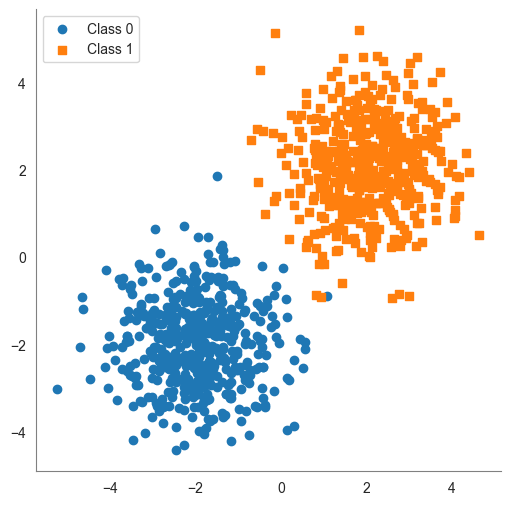

In [4]:
# plot the data

sns.set_style('white')
plt.figure(figsize=(6, 6))
plt.scatter(class0[:, 0], class0[:, 1], marker='o', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], marker='s', label='Class 1')
sns.despine()
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.legend()
plt.show()

## Decision Boundary    

A **decision boundary** is a surface that separates different classes in the feature space. For linear classifiers, this boundary is a linear function of the input features​. In a 2D space (with two features), the decision boundary is a straight line. In a 3D space (three features), it’s a flat plane. In $n$-dimensional feature space, the decision boundary is an $(n-1)$-dimensional hyperplane. All these are simply the generalization of a "line" to higher dimensions.

In linear classification, the decision boundary is often called a **hyperplane**. It’s defined by an equation of the form:

$$
w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b = 0,
$$

where 
* $x_1, \ldots, x_n$ are the feature values,
* $w_1, \ldots, w_n$ are the weights, and
* $b$ is the bias​.

The vector of weights $(w_1, \ldots, w_n)$ is perpendicular to the hyperplane. Any point that satisfies the equation lies on the decision boundary. Points for which

$$
w_1 x_1 + \cdots + w_n x_n + b > 0
$$

will be on one side of the hyperplane (classified as one class), and points with

$$
w_1 x_1 + \cdots + w_n x_n + b < 0
$$

will be on the other side (the other class).  Essentially, a hyperplane is the decision boundary that differentiates the two classes in the feature space.



#### Finding a Decision Boundary

In the following code you can manually set the weights and bias to see how well the decision boundary separates the two classes.  

The accuracy of the classifier is calculated as the percentage of correctly classified points.

In [5]:
# Define weights and bias for a manual linear classifier
w = np.array([1.0, 1.0])  # weight vector (w1=1, w2=1)
b = 0.0                   # bias term

# Compute the linear combination (score) for each point
scores = X.dot(w) + b   # this gives w1*x1 + w2*x2 + b for each sample

# Apply a threshold at 0 to classify into 0 or 1
predicted_labels = (scores >= 0).astype(int)

# Calculate accuracy of this manual classifier
accuracy = np.mean(predicted_labels == y)
print("Manual classifier accuracy:", accuracy)


Manual classifier accuracy: 0.997


```{warning}

The following code asks for input from the user.  You can run the code and input the weights and bias to see how well the decision boundary separates the two classes. This will only work if the notebook is running locally or in colab.  It will **not** work on the course website. 

```


In [6]:
from ipywidgets import interact, FloatSlider

# Define a function to plot data and decision boundary for given w1, w2, b
def plot_boundary_(w1, w2, b):
    # Compute the line points for the decision boundary: w1*x1 + w2*x2 + b = 0
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if abs(w2) < 1e-6:
        y_vals = np.full_like(x_vals, -b)  # Vertical line at -b
    else:
        y_vals = -(w1 / w2) * x_vals - (b / w2)

    # Compute predictions
    predictions = np.sign(w1 * X[:, 0] + w2 * X[:, 1] + b)
    y[y == 0] = -1
    misclassified = predictions != y
    accuracy = np.mean(predictions == y)

    sns.set_style('white')
    plt.figure(figsize=(6, 6))

    plt.scatter(class0[:, 0], class0[:, 1], marker='o', label='Class 0')
    plt.scatter(class1[:, 0], class1[:, 1], marker='s', label='Class 1')

    plt.scatter(X[misclassified, 0], X[misclassified, 1], 
                color='black', marker='x', s=100, label="Misclassified")  # Fix warning
    plt.plot(x_vals, y_vals, 'g--', linewidth=2)  # Green dashed line for boundary
    
    # Compute midpoint of the decision boundary for normal vector placement
    mid_x = (X[:, 0].min() + X[:, 0].max()) / 2
    mid_y = -(w1 / w2) * mid_x - (b / w2) if abs(w2) > 1e-6 else -b

    # Normalize normal vector to a fixed length
    normal_length = 1.0
    norm = np.sqrt(w1**2 + w2**2)
    if norm > 0:
        unit_w1, unit_w2 = (w1 / norm) * normal_length, (w2 / norm) * normal_length
        plt.arrow(mid_x, mid_y, unit_w1, unit_w2, color='purple', head_width=0.2, head_length=0.2, label="Normal Vector")
    
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    sns.despine()
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.title(f"Decision Boundary: ${w1:.2f}*x_1 + {w2:.2f}*x_2 + {b:.2f} = 0$\nAccuracy: {accuracy:.2%}\n")
    # don't show the line for the normal vector
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles=handles[:-1], 
        labels=labels[:-1],
        loc='center left', 
        bbox_to_anchor=(1, 0.5))
    
    plt.show()

# Use interact to create sliders for w1, w2, b
interact(plot_boundary_, 
         w1=FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='w1'),
         w2=FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='w2'),
         b=FloatSlider(min=-10.0, max=10.0, step=0.01, value=0.0, description='bias'));


interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…